<h3><center>Breaking the Silence:
<br>
 An In-depth Exploration of Rape Statistics in India<h3>

<h4>Import all required libraries and packages

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import json

<h4>Upload the datset

In [244]:
Attempt_to_commit_rape_I_V  = pd.read_csv('Rape_Data/Attempt_to_commit_rape_I_V.csv')
CrimeAgainstWomen  = pd.read_csv('Rape_Data/CrimeAgainstWomen_Total_2016-18.csv')
economy_data = pd.read_csv("Rape_Data/Economy_Data.csv")
Rapist_Victim_relation  = pd.read_csv('Rape_Data/Rapist_Victim_relation.csv')
RapeCommited_I_V =pd.read_csv('Rape_Data/RapeCommited_I_V.csv')
Rape_under_Different_age_groups_2018 = pd.read_csv('Rape_Data/Rape_under_Different_age_groups_2018.csv')
punished_rapists = pd.read_csv('Rape_Data/punished_rapists.csv')
Police_Disposal_CrimeHead_Wise_2018 = pd.read_csv('Rape_Data/Police_Disposal(CrimeHead-Wise)-2018.csv')
Non_custodial_rape = pd.read_csv('Rape_Data/Non_custodial_rape.csv')
Custodial_rape = pd.read_csv('Rape_Data/Custodial_rape.csv')
Disposal_CrimeHead_Wise_2018 =pd.read_csv('Rape_Data/Disposal(CrimeHead-Wise)-2018.csv')
Population_Dsitribution_statewise = pd.read_csv('Rape_Data/Population_Dsitribution_statewise.csv')
Non_custodial_rape_2021 = pd.read_csv('Rape_Data/Non_custodial_rape_2021.csv')
Custodial_rape_2021 = pd.read_csv('Rape_Data/Custodial_rape_2021.csv')

In [125]:
Attempt_to_commit_rape_I_V

,State/UT,Attempt to Commit Rape (Total)(I),Attempt to Commit Rape (Total)(V),A) Women (18 Yrs. And above)(I),A) Women (18 Yrs. And above)(I).1,B) Girls (Below 18 yrs))(I),B) Girls (Below 18 yrs))(I).1
0,Andhra Pradesh,191,192,144,144,47,48
1,Arunachal Pradesh,11,12,5,5,6,7
2,Assam,527,527,525,525,2,2
3,Bihar,110,110,105,105,5,5
4,Chhattisgarh,27,27,10,10,17,17
5,Goa,0,0,0,0,0,0
6,Gujarat,4,4,3,3,1,1
7,Haryana,176,176,172,172,4,4
8,Himachal Pradesh,11,11,6,6,5,5
9,Jammu & Kashmir,23,23,17,17,6,6


<h5>Tracking underlying patterns in attempted rape cases for women above and below the age of 18 in all Indian states and UTs.

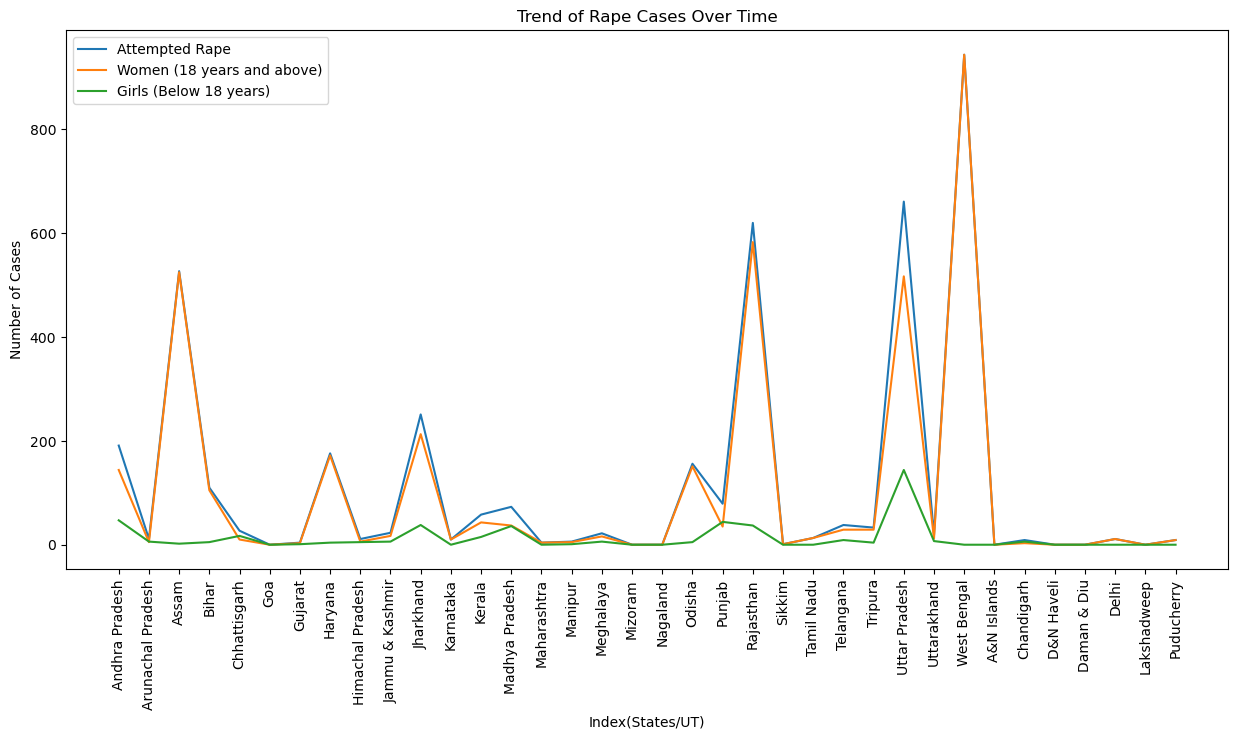

In [126]:
plt.figure(figsize=(15, 7))
plt.plot(Attempt_to_commit_rape_I_V['State/UT'], Attempt_to_commit_rape_I_V['Attempt to Commit Rape (Total)(I)'], label='Attempted Rape')
plt.plot(Attempt_to_commit_rape_I_V['State/UT'], Attempt_to_commit_rape_I_V['A) Women (18 Yrs. And above)(I)'], label='Women (18 years and above)')
plt.plot(Attempt_to_commit_rape_I_V['State/UT'], Attempt_to_commit_rape_I_V['B) Girls (Below 18 yrs))(I)'], label='Girls (Below 18 years)')
plt.title('Trend of Rape Cases Over Time')
plt.xlabel('Index(States/UT)')
plt.xticks(rotation=90)
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


In [127]:
CrimeAgainstWomen.head(5)

,State/UT,2016,2017,2018,Percentage State Share To All-India (2018),Mid-Year Projected Female Population (In Lakhs) (2018)+,Rate of Total Crime against Women (2018)++
0,Andhra Pradesh,16362,17909,16438,4.3,260.0,63.2
1,Arunachal Pradesh,367,337,368,0.1,7.2,51.1
2,Assam,20869,23082,27728,7.3,167.0,166.0
3,Bihar,13400,14711,16920,4.5,567.4,29.8
4,Chhattisgarh,5947,7996,8587,2.3,141.9,60.5


**Are there any consistent trends over these three years in crime against womens?**

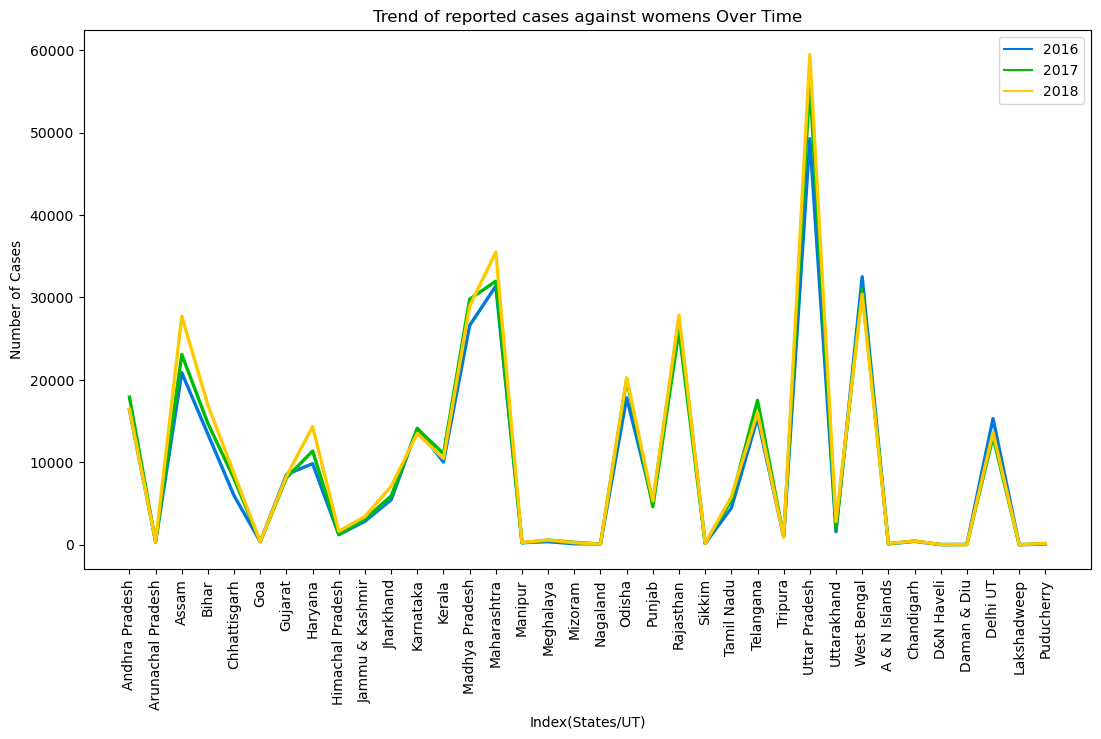

In [128]:
data1= CrimeAgainstWomen[['State/UT','2016','2017','2018']]
data1.set_index('State/UT', inplace=True)
plt.figure(figsize=(13,7))
sns.lineplot(data1,palette='nipy_spectral',linewidth=2.4,dashes=False)

plt.title('Trend of reported cases against womens Over Time')
plt.xlabel('Index(States/UT)')
plt.xticks(rotation=90)
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

* We can observe that mostly the data remains same during the period 2016 2017 2018, and West Bengal tops all three years with maximum no. of Crime  against women
* 

**Q) Are there regional patterns or clusters of higher or lower crime rates?(NSEW)**

In [176]:
central_india = ['Madhya Pradesh ', 'Chhattisgarh ']
west_india = ['Rajasthan ', 'Gujarat ', 'Maharashtra ', 'Goa ']
east_india = ['Bihar ', 'Jharkhand ', 'Odisha ', 'West Bengal ', 'Sikkim ', 'Assam ', 'Arunachal Pradesh ', 'Nagaland ', 'Manipur ', 'Mizoram ', 'Tripura ', 'Meghalaya']
south_india = ['Andhra Pradesh ', 'Telangana ', 'Karnataka ', 'Tamil Nadu ', 'Kerala ']
north_india = ['Jammu & Kashmir ', 'Himachal Pradesh ', 'Punjab ', 'Haryana ', 'Uttarakhand ', 'Uttar Pradesh ', 'Delhi UT ']
for i in range(len(central_india)):
    central_india[i]=central_india[i].strip()
for i in range(len(west_india)):
    west_india[i]=west_india[i].strip()
for i in range(len(east_india)):
    east_india[i]=east_india[i].strip()
for i in range(len(south_india)):
    south_india[i]=south_india[i].strip()
for i in range(len(north_india)):
    north_india[i]=north_india[i].strip()

region_mapping = {
    **{state: 'North' for state in north_india},
    **{state: 'South' for state in south_india},
    **{state: 'East' for state in east_india},
    **{state: 'West' for state in west_india},
    **{state: 'Central' for state in central_india}
}

Text(0.5, 1.0, 'Region v.s 2018')

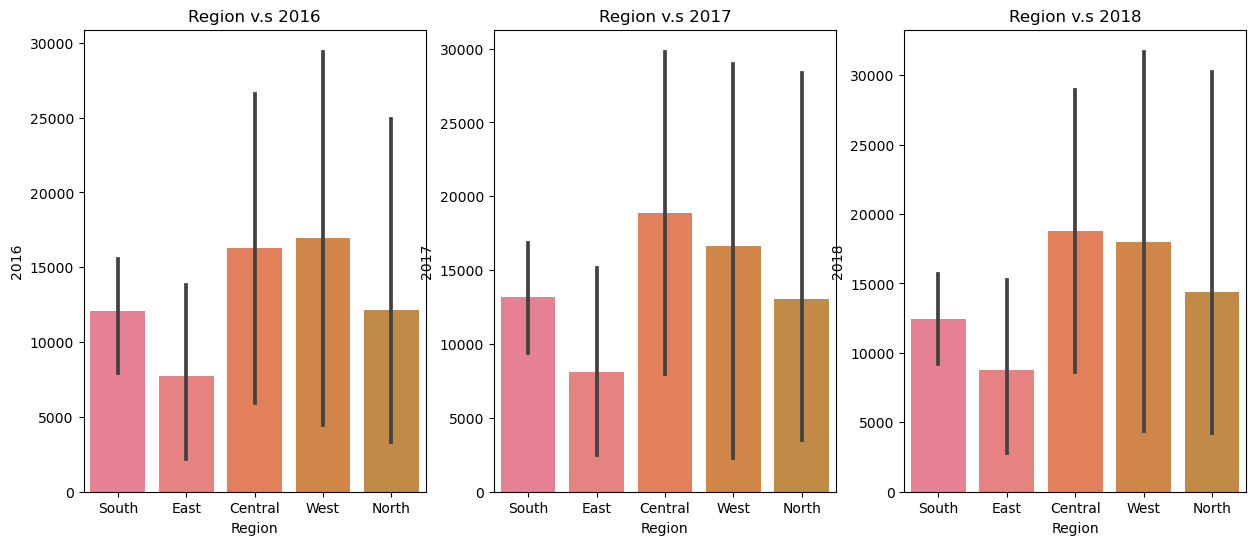

In [177]:
CrimeAgainstWomen['Region'] = CrimeAgainstWomen['State/UT'].map(region_mapping)

custom_palette = sns.color_palette('husl', len(CrimeAgainstWomen['Region']))
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
sns.barplot(CrimeAgainstWomen, x="Region", y="2016", ax=axes[0], palette=custom_palette)
axes[0].set_title("Region v.s 2016")
sns.barplot(CrimeAgainstWomen, x="Region", y="2017", ax=axes[1], palette=custom_palette)
axes[1].set_title("Region v.s 2017")
sns.barplot(CrimeAgainstWomen, x="Region", y="2018", ax=axes[2], palette=custom_palette)
axes[2].set_title("Region v.s 2018")

**Q) How do changes in population relate to changes in crime rates?(population data for each state for 2016-17-18)**

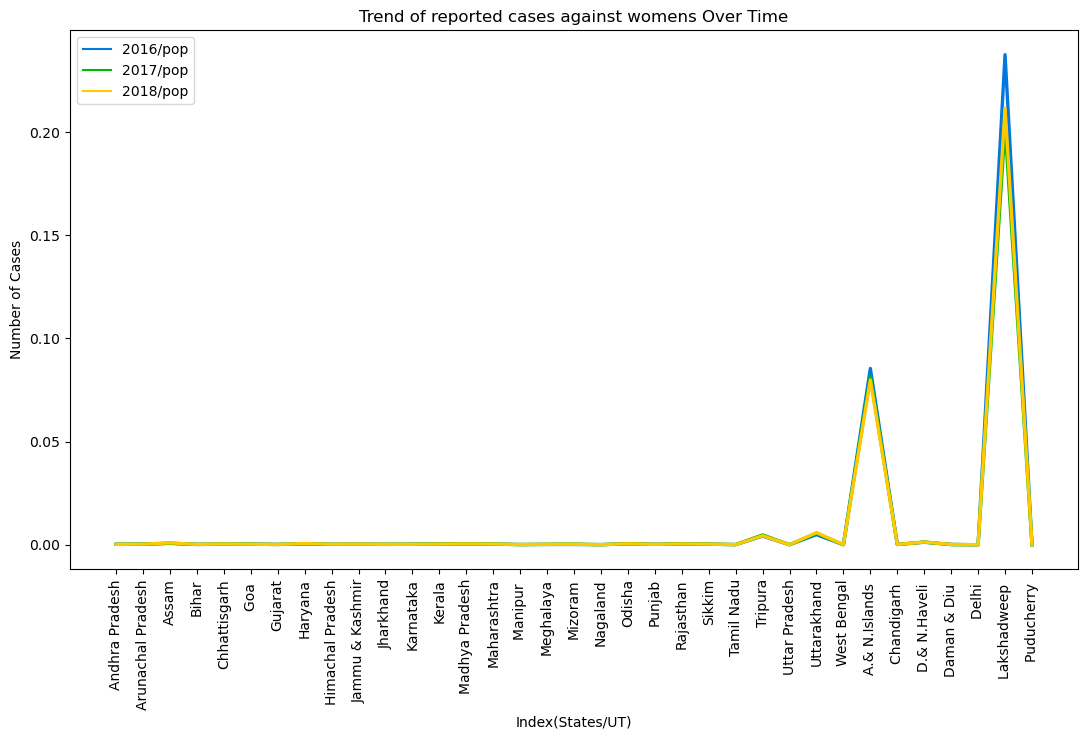

In [178]:
len(Population_Dsitribution_statewise['State/UT'].to_list())
CrimeAgainstWomen_population = CrimeAgainstWomen
#CrimeAgainstWomen_population.drop(35,inplace=True)
CrimeAgainstWomen_population['State/UT'] = Population_Dsitribution_statewise['State/UT']
CrimeAgainstWomen_population = pd.merge(CrimeAgainstWomen_population,Population_Dsitribution_statewise,on='State/UT',how='inner')
CrimeAgainstWomen_population['2016/pop'] = CrimeAgainstWomen_population['2016']/CrimeAgainstWomen_population['Total Population']
CrimeAgainstWomen_population['2017/pop'] = CrimeAgainstWomen_population['2017']/CrimeAgainstWomen_population['Total Population']
CrimeAgainstWomen_population['2018/pop'] = CrimeAgainstWomen_population['2018']/CrimeAgainstWomen_population['Total Population']

data2= CrimeAgainstWomen_population[['State/UT','2016/pop','2017/pop','2018/pop']]
data2.set_index('State/UT', inplace=True)
plt.figure(figsize=(13,7))
sns.lineplot(data2,palette='nipy_spectral',linewidth=2.4,dashes=False)

plt.title('Trend of reported cases against womens Over Time')
plt.xlabel('Index(States/UT)')
plt.xticks(rotation=90)
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

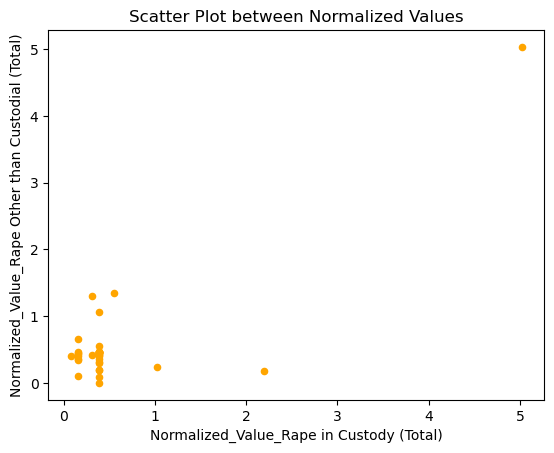

In [179]:
data = pd.merge(Custodial_rape[["State/UT","Rape in Custody (Total)"]], Non_custodial_rape[["State/UT","Rape Other than Custodial (Total)"]], on='State/UT')
data['Normalized_Value_Rape in Custody (Total)'] = abs((data['Rape in Custody (Total)'] - data['Rape in Custody (Total)'].mean()) / data['Rape in Custody (Total)'].std())
data['Normalized_Value_Rape Other than Custodial (Total)'] = abs((data['Rape Other than Custodial (Total)'] - data['Rape Other than Custodial (Total)'].mean()) / data['Rape Other than Custodial (Total)'].std())
plt.figure(figsize=(8, 6))
data.plot.scatter(x='Normalized_Value_Rape in Custody (Total)', y='Normalized_Value_Rape Other than Custodial (Total)', c='orange', marker='o')
plt.title('Scatter Plot between Normalized Values')
plt.xlabel('Normalized_Value_Rape in Custody (Total)')
plt.ylabel('Normalized_Value_Rape Other than Custodial (Total)')
plt.show()

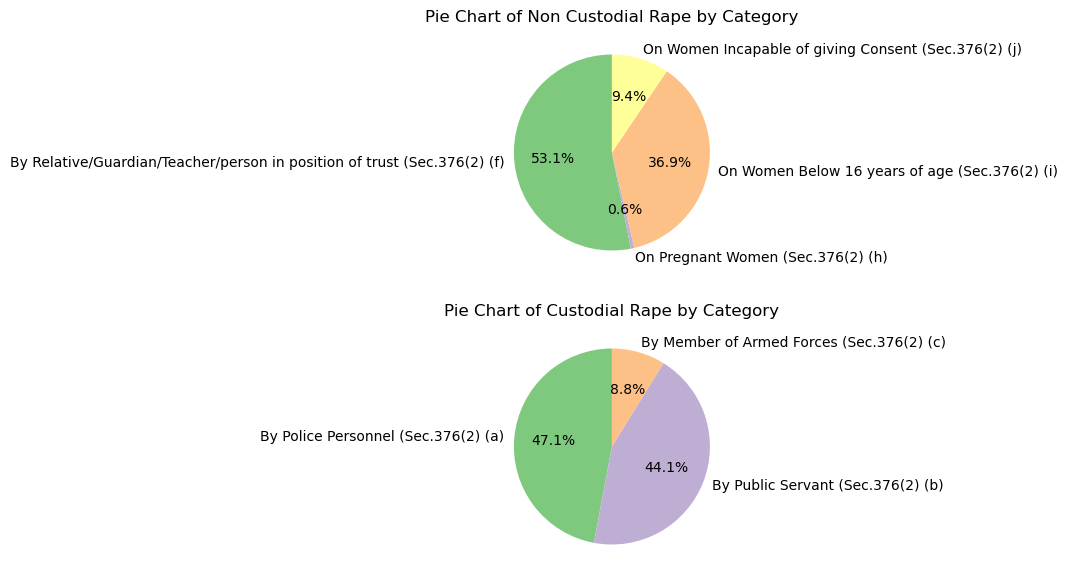

<Figure size 800x800 with 0 Axes>

In [180]:
fig, axes = plt.subplots(2, 1, figsize=(12, 7))
pie_data1=Non_custodial_rape[['By Relative/Guardian/Teacher/person in position of trust (Sec.376(2) (f)','On Pregnant Women (Sec.376(2) (h)','On Women Below 16 years of age (Sec.376(2) (i)','On Women Incapable of giving Consent (Sec.376(2) (j)']]
pie_data2=Custodial_rape[['By Police Personnel (Sec.376(2) (a)','By Public Servant (Sec.376(2) (b)','By Member of Armed Forces (Sec.376(2) (c)']]
custom_palette = sns.color_palette("Accent", len(pie_data1))
plt.figure(figsize=(8, 8))
axes[0].pie(pie_data1.sum(),autopct='%1.1f%%', startangle=90,colors=custom_palette,labels=pie_data1.transpose().index)
axes[0].set_title('Pie Chart of Non Custodial Rape by Category')
axes[1].pie(pie_data2.sum(),autopct='%1.1f%%', startangle=90,colors=custom_palette,labels=pie_data2.transpose().index)
axes[1].set_title('Pie Chart of Custodial Rape by Category')
plt.tight_layout() 
plt.show()



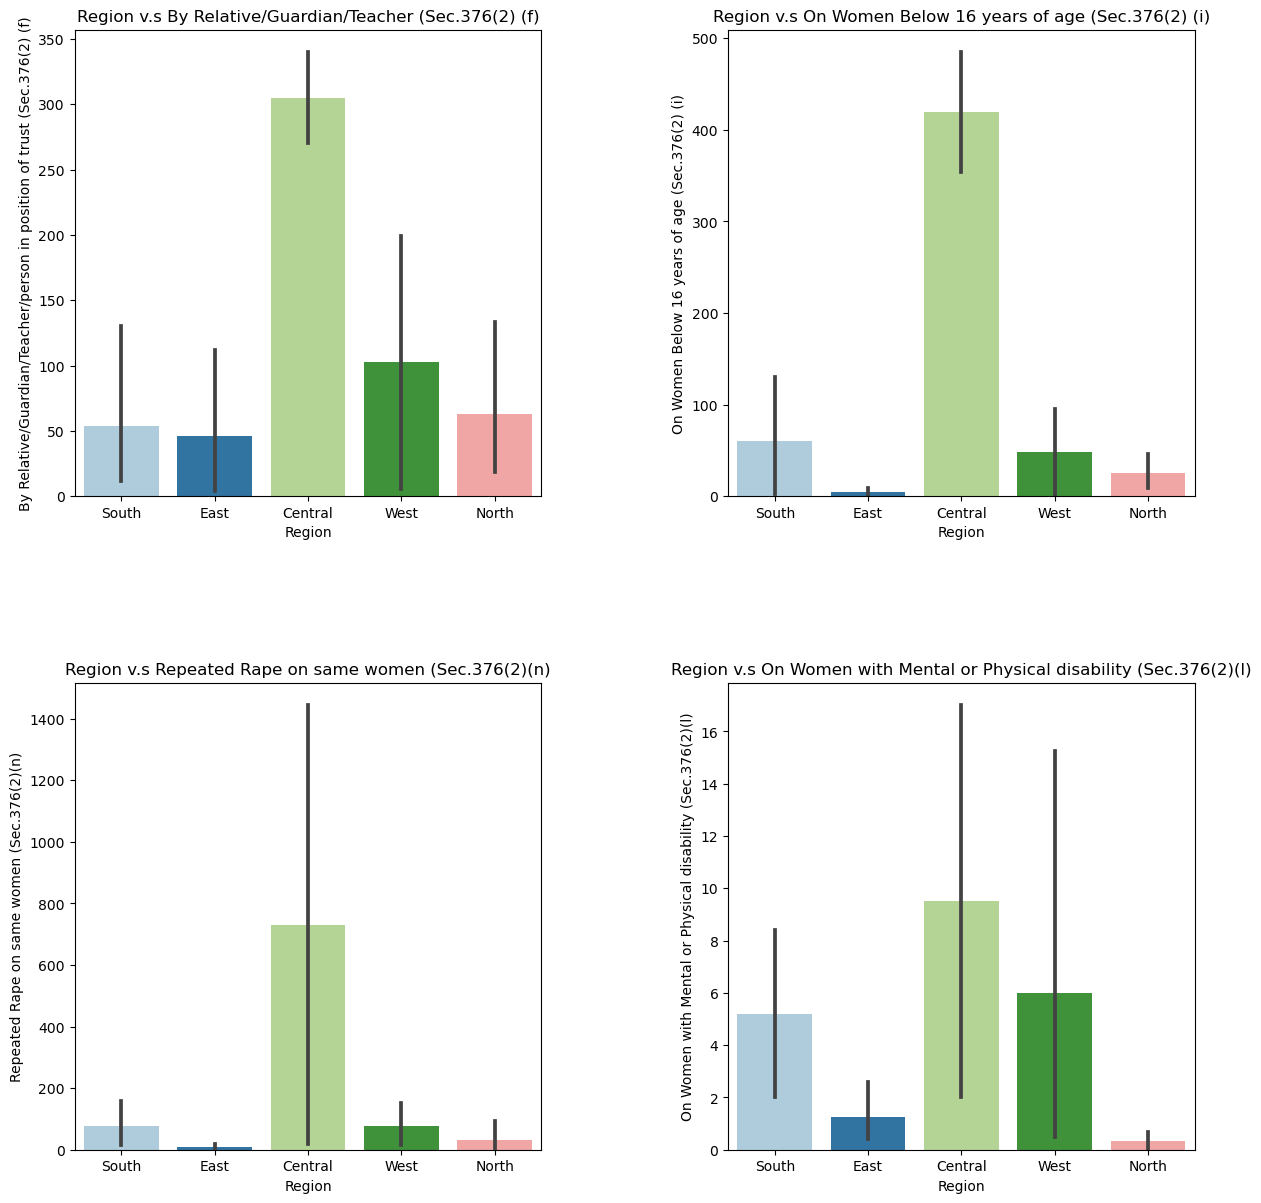

In [161]:
Non_custodial_rape['Region'] = Non_custodial_rape['State/UT'].map(region_mapping)

vibrant_palette = sns.color_palette('husl', len(Non_custodial_rape['Region']))
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

sns.barplot(Non_custodial_rape, x="Region", y="By Relative/Guardian/Teacher/person in position of trust (Sec.376(2) (f)", ax=axes[0,0], palette=custom_palette)
axes[0,0].set_title("Region v.s By Relative/Guardian/Teacher (Sec.376(2) (f)")
sns.barplot(Non_custodial_rape, x="Region", y="On Women Below 16 years of age (Sec.376(2) (i)", ax=axes[0,1], palette=custom_palette)
axes[0,1].set_title("Region v.s On Women Below 16 years of age (Sec.376(2) (i)")
sns.barplot(Non_custodial_rape, x="Region", y="Repeated Rape on same women (Sec.376(2)(n)", ax=axes[1,0], palette=custom_palette)
axes[1,0].set_title("Region v.s Repeated Rape on same women (Sec.376(2)(n)")
sns.barplot(Non_custodial_rape, x="Region", y="On Women with Mental or Physical disability (Sec.376(2)(l)", ax=axes[1,1], palette=custom_palette)
axes[1,1].set_title("Region v.s On Women with Mental or Physical disability (Sec.376(2)(l)")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

In [26]:
Police_Disposal_CrimeHead_Wise_2018.head(5)

,Crime Head,Cases Pending Investigation from Previous Year,Cases Reported during the year,Cases Reopened for Investigation,Total Cases for Investigation,Cases Not Investigated Under 157_1_b CRPC,Cases True but Insufficient Evidence or Untraced or No Clue,Cases Abated during Investigation,Total,Cases Charge_sheeted Out of Cases from Previous Year,Cases Charge_sheeted Out of Cases during the Year,Cases Charge_sheeted
0,2,3,4,5,6,7,13,14,15,16,17,18
1,POCSO Act Section 4 & 6,7761,21401,2,29164,1,360,42,817,4538,15006,19544
2,POCSO Act Section 8 & 10,5507,14124,10,19641,0,294,5,774,2845,9652,12497
3,Rape,13762,33356,21,47139,1,1093,75,4841,7054,21415,28469
4,Murder with Rape/Gang Rape,99,294,0,393,0,24,2,33,31,193,224


In [27]:
punished_rapists.head(5)

,State/UT,By Seperated husband (Sec.376 (B)),Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) (Sec.376(DA)),By Person in Authority (Sec.376 (C)),Gang Rape (Sec.376(D)),Rape/Gang Rape of Girl Below 12 Yrs (Imprisonment for life till death) (Sec.376(DB)),Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) (Sec.376(DB)),Punishment for Repeat offenders (Sec.376(E)),Rape (Total) (Sec.376 IPC)
0,Andhra Pradesh,0,13,1,12,0,4,0,971
1,Arunachal Pradesh,0,0,0,1,2,0,0,67
2,Assam,2,0,0,20,1,0,0,1648
3,Bihar,0,0,0,8,1,0,0,651
4,Chhattisgarh,0,14,1,38,4,10,6,2091


In [28]:
Rape_under_Different_age_groups_2018.head(5)

,State/UT,Cases Reported,Below 6 Years,6 Years & Above (Below 12 Years),12 Years & Above(Below 16 Years),16 Years & Above(Below 18 Years ),Total Girl /Child Victims(Below 18),18 Years & Above( Below 30 Years ),30 Years & Above (Below 45 Years),45 Years & Above(Below 60 Years),60 Years & Above,Total Women / Adult Victims(Above 18),Total Victims
0,Andhra Pradesh,971,16,57,181,251,505,373,76,14,5,468,973
1,Arunachal Pradesh,67,4,4,13,11,32,29,9,0,0,38,70
2,Assam,1648,7,24,6,52,89,1043,523,107,5,1678,1767
3,Bihar,651,0,0,1,3,4,520,111,16,0,647,651
4,Chhattisgarh,2091,41,80,557,541,1219,644,190,42,6,882,2101


In [29]:
RapeCommited_I_V.head(5)

,State/UT,Rape (Total)(I),Rape (Total)(V),Women (18 Yrs. And above)(I),Women (18 Yrs. And above)(V),Girls (Below 18 yrs)(I),Girls (Below 18 yrs)(V)
0,Andhra Pradesh,971,973,468,468,503,505
1,Arunachal Pradesh,67,70,38,38,29,32
2,Assam,1648,1767,1559,1678,89,89
3,Bihar,651,651,647,647,4,4
4,Chhattisgarh,2091,2101,876,882,1215,1219


**Q) What is the difference between "Rape (Total)(I)" and "Rape (Total)(V)"? How do these two categories relate to each other?**

I siginifies the no. of incidents and V means no.of victims.

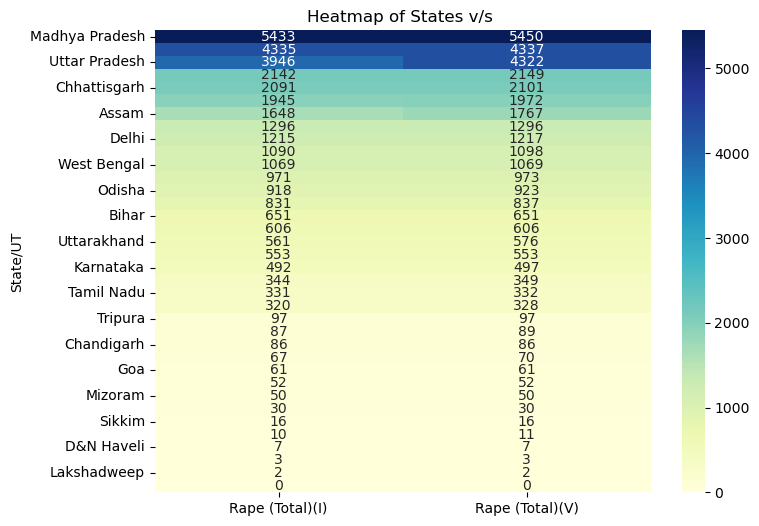

In [30]:
data=RapeCommited_I_V[["State/UT","Rape (Total)(I)","Rape (Total)(V)"]].sort_values('Rape (Total)(V)',ascending=False).set_index('State/UT')
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, cmap='YlGnBu', fmt='g',)
plt.title('Heatmap of States v/s ')
plt.show()

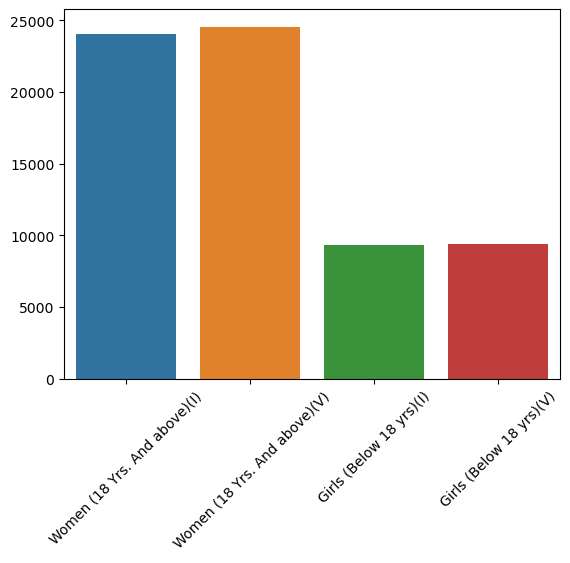

In [31]:
data=RapeCommited_I_V.drop(columns=["Rape (Total)(I)","Rape (Total)(V)"]).sum()
data=data.to_frame()
data=data.iloc[1:]
sns.barplot(data.transpose(),)
plt.xticks(rotation=45)
plt.show()

As We can see the total no. of victims is greater than total no. of incidences. Hence in each incident no. of vicims were >= 1.
And no. of (18 yrs And Above) 2.5 times the (Below 18 yrs).

In [32]:
Rapist_Victim_relation.head(5)

,State/UT,Cases Offender known to Victim (Total),Family members,Family Friends/ Neighbours/ Employer or Other Known Persons,Friends/Online-Friends or Live in Partners on Pretext of Marriage/Seperated Husband,Cases Offenders Unknown or Not Identified,Total Rape Cases (Known+unknown Offenders),Percentage Share of Known Cases to Total Rape Cases
0,Andhra Pradesh,912,64,474,374,59,971,93.9
1,Arunachal Pradesh,63,11,33,19,4,67,94
2,Assam,1488,141,784,563,160,1648,90.3
3,Bihar,639,7,219,413,12,651,98.2
4,Chhattisgarh,1915,136,796,983,176,2091,91.6


In [33]:
states= Rapist_Victim_relation["State/UT"].tolist()
for i in range(len(states)):
    states[i]=states[i].strip()
states
Rapist_Victim_relation["State/UT"]=pd.Series(states)

In [34]:
Rapist_Victim_relation.shape

(36, 8)

In [35]:
Rapist_Victim_relation.columns

Index(['State/UT', 'Cases Offender known to Victim (Total)', 'Family members',
       'Family Friends/ Neighbours/ Employer or Other Known Persons',
       'Friends/Online-Friends or Live in Partners on Pretext of Marriage/Seperated Husband',
       'Cases Offenders Unknown or Not Identified',
       'Total Rape Cases (Known+unknown Offenders)',
       'Percentage Share of Known Cases to Total Rape Cases '],
      dtype='object')

In [36]:
Rapist_Victim_relation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                                                                               Non-Null Count  Dtype 
---  ------                                                                               --------------  ----- 
 0   State/UT                                                                             36 non-null     object
 1   Cases Offender known to Victim (Total)                                               36 non-null     int64 
 2   Family members                                                                       36 non-null     int64 
 3   Family Friends/ Neighbours/ Employer or Other Known Persons                          36 non-null     int64 
 4   Friends/Online-Friends or Live in Partners on Pretext of Marriage/Seperated Husband  36 non-null     int64 
 5   Cases Offenders Unknown or Not Identified                                            36 non-null     i

In [37]:
Rapist_Victim_relation.describe()

,Cases Offender known to Victim (Total),Family members,Family Friends/ Neighbours/ Employer or Other Known Persons,Friends/Online-Friends or Live in Partners on Pretext of Marriage/Seperated Husband,Cases Offenders Unknown or Not Identified,Total Rape Cases (Known+unknown Offenders)
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,870.000000,77.222222,443.666667,349.111111,56.555556,926.555556
std,1205.161661,117.658856,637.630300,483.048875,111.734493,1291.949567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.250000,4.000000,30.000000,18.250000,2.750000,58.750000
50%,455.500000,20.000000,205.500000,144.000000,8.000000,522.500000
75%,1059.750000,122.750000,567.750000,449.750000,59.250000,1121.250000
max,5209.000000,553.000000,2543.000000,2113.000000,587.000000,5433.000000


In [38]:
Q1 = Rapist_Victim_relation['Total Rape Cases (Known+unknown Offenders)'].quantile(0.25)
Q3 = Rapist_Victim_relation['Total Rape Cases (Known+unknown Offenders)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (Rapist_Victim_relation['Total Rape Cases (Known+unknown Offenders)'] < lower_bound) | (Rapist_Victim_relation['Total Rape Cases (Known+unknown Offenders)'] > upper_bound)
Rapist_Victim_relation[outliers].sort_values(by='Total Rape Cases (Known+unknown Offenders)', ascending=False)

,State/UT,Cases Offender known to Victim (Total),Family members,Family Friends/ Neighbours/ Employer or Other Known Persons,Friends/Online-Friends or Live in Partners on Pretext of Marriage/Seperated Husband,Cases Offenders Unknown or Not Identified,Total Rape Cases (Known+unknown Offenders),Percentage Share of Known Cases to Total Rape Cases
13,Madhya Pradesh,5209,553,2543,2113,224,5433,95.9
21,Rajasthan,3748,298,2193,1257,587,4335,86.5
26,Uttar Pradesh,3718,287,2121,1310,228,3946,94.2


**Q) Are there any trends or patterns in the cases involving family friends, neighbors, employers, or other known persons?**

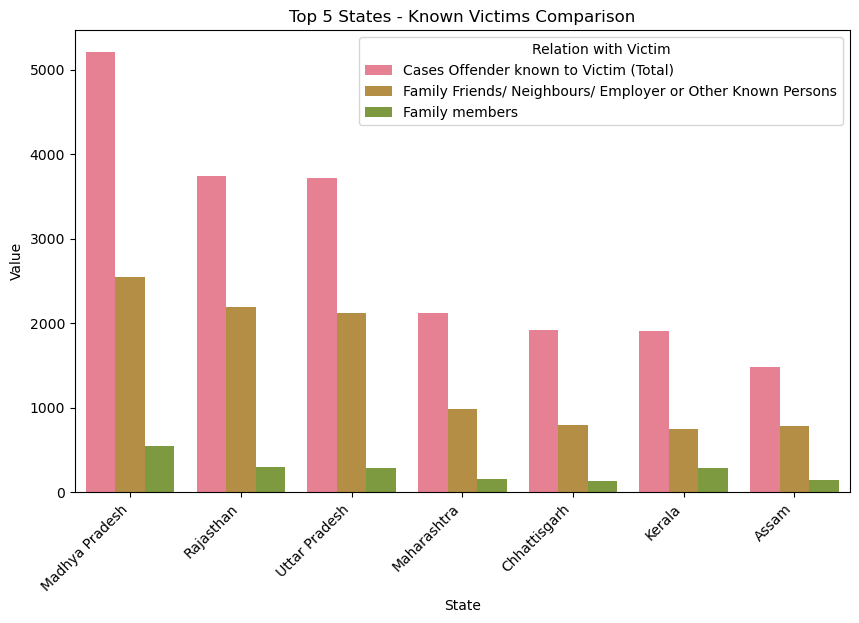

In [39]:
data = Rapist_Victim_relation.sort_values(by="Cases Offender known to Victim (Total)", ascending=False)
data = data.head(7)
data= data[['State/UT', 'Cases Offender known to Victim (Total)', 'Family Friends/ Neighbours/ Employer or Other Known Persons','Family members']]
melted_data = pd.melt(data, id_vars=['State/UT'], var_name='Attribute', value_name='Value')

vibrant_palette = sns.color_palette('husl', len(data['State/UT']))

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='State/UT', y='Value', hue='Attribute', data=melted_data, palette=vibrant_palette)
plt.title('Top 5 States - Known Victims Comparison')
plt.ylabel('Value')
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Relation with Victim')
plt.show()

In [40]:
percentage_data = pd.DataFrame()

# Calculate the percentages
new_data = Rapist_Victim_relation.sort_values(by="Cases Offender known to Victim (Total)", ascending=False)
percentage_data['State/UT'] = new_data['State/UT']
percentage_data['Family Members Percentage'] = (new_data['Family members'] / new_data['Cases Offender known to Victim (Total)']) * 100
percentage_data['Family Friends Percentage'] = (new_data['Family Friends/ Neighbours/ Employer or Other Known Persons'] / new_data['Cases Offender known to Victim (Total)']) * 100
percentage_data['Total Percentage'] = ((new_data['Family members']+new_data['Family Friends/ Neighbours/ Employer or Other Known Persons'])/new_data['Cases Offender known to Victim (Total)']) * 100
percentage_data

,State/UT,Family Members Percentage,Family Friends Percentage,Total Percentage
13,Madhya Pradesh,10.616241,48.819351,59.435592
21,Rajasthan,7.950907,58.511206,66.462113
26,Uttar Pradesh,7.719204,57.046799,64.766003
14,Maharashtra,7.438795,46.657250,54.096045
4,Chhattisgarh,7.101828,41.566580,48.668407
12,Kerala,14.733542,39.341693,54.075235
2,Assam,9.475806,52.688172,62.163978
7,Haryana,11.974110,60.194175,72.168285
33,Delhi UT,10.469012,42.629816,53.098827
10,Jharkhand,12.019704,49.950739,61.970443


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


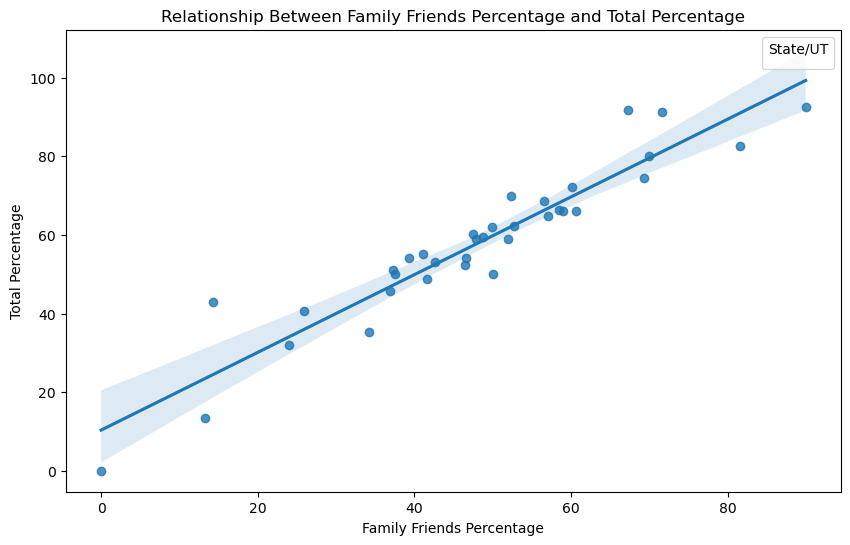

In [41]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Family Friends Percentage', y='Total Percentage', data=percentage_data,)
plt.title('Relationship Between Family Friends Percentage and Total Percentage')
plt.xlabel('Family Friends Percentage')
plt.ylabel('Total Percentage')
plt.legend(title='State/UT', bbox_to_anchor=(1, 1))
plt.show()



#Display On the spot#
From this Plot we can see that that family friends percentage is linearly related to total known percentage linearly.

**What is the percentage share of known offenders compared to cases where the offender is unknown or not identified?**

In [42]:
new_data.columns

Index(['State/UT', 'Cases Offender known to Victim (Total)', 'Family members',
       'Family Friends/ Neighbours/ Employer or Other Known Persons',
       'Friends/Online-Friends or Live in Partners on Pretext of Marriage/Seperated Husband',
       'Cases Offenders Unknown or Not Identified',
       'Total Rape Cases (Known+unknown Offenders)',
       'Percentage Share of Known Cases to Total Rape Cases '],
      dtype='object')

In [43]:
percentage_data['Known Offenders'] = (new_data['Cases Offender known to Victim (Total)'] / new_data['Total Rape Cases (Known+unknown Offenders)']) * 100
percentage_data['Unknown Offenders'] = (new_data['Cases Offenders Unknown or Not Identified'] / new_data['Total Rape Cases (Known+unknown Offenders)']) * 100

In [44]:
percentage_data

,State/UT,Family Members Percentage,Family Friends Percentage,Total Percentage,Known Offenders,Unknown Offenders
13,Madhya Pradesh,10.616241,48.819351,59.435592,95.877048,4.122952
21,Rajasthan,7.950907,58.511206,66.462113,86.459054,13.540946
26,Uttar Pradesh,7.719204,57.046799,64.766003,94.221997,5.778003
14,Maharashtra,7.438795,46.657250,54.096045,99.159664,0.840336
4,Chhattisgarh,7.101828,41.566580,48.668407,91.582975,8.417025
12,Kerala,14.733542,39.341693,54.075235,98.406170,1.593830
2,Assam,9.475806,52.688172,62.163978,90.291262,9.708738
7,Haryana,11.974110,60.194175,72.168285,95.370370,4.629630
33,Delhi UT,10.469012,42.629816,53.098827,98.271605,1.728395
10,Jharkhand,12.019704,49.950739,61.970443,93.119266,6.880734


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


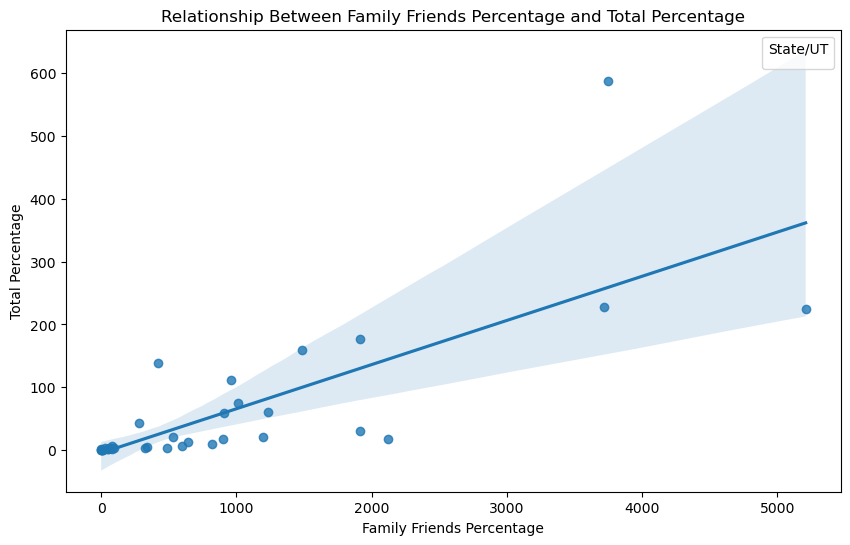

In [45]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Cases Offender known to Victim (Total)', y='Cases Offenders Unknown or Not Identified', data=new_data)
plt.title('Relationship Between Family Friends Percentage and Total Percentage')
plt.xlabel('Family Friends Percentage')
plt.ylabel('Total Percentage')
plt.legend(title='State/UT', bbox_to_anchor=(1, 1))
plt.show()

In [46]:
percentage_data

,State/UT,Family Members Percentage,Family Friends Percentage,Total Percentage,Known Offenders,Unknown Offenders
13,Madhya Pradesh,10.616241,48.819351,59.435592,95.877048,4.122952
21,Rajasthan,7.950907,58.511206,66.462113,86.459054,13.540946
26,Uttar Pradesh,7.719204,57.046799,64.766003,94.221997,5.778003
14,Maharashtra,7.438795,46.657250,54.096045,99.159664,0.840336
4,Chhattisgarh,7.101828,41.566580,48.668407,91.582975,8.417025
12,Kerala,14.733542,39.341693,54.075235,98.406170,1.593830
2,Assam,9.475806,52.688172,62.163978,90.291262,9.708738
7,Haryana,11.974110,60.194175,72.168285,95.370370,4.629630
33,Delhi UT,10.469012,42.629816,53.098827,98.271605,1.728395
10,Jharkhand,12.019704,49.950739,61.970443,93.119266,6.880734


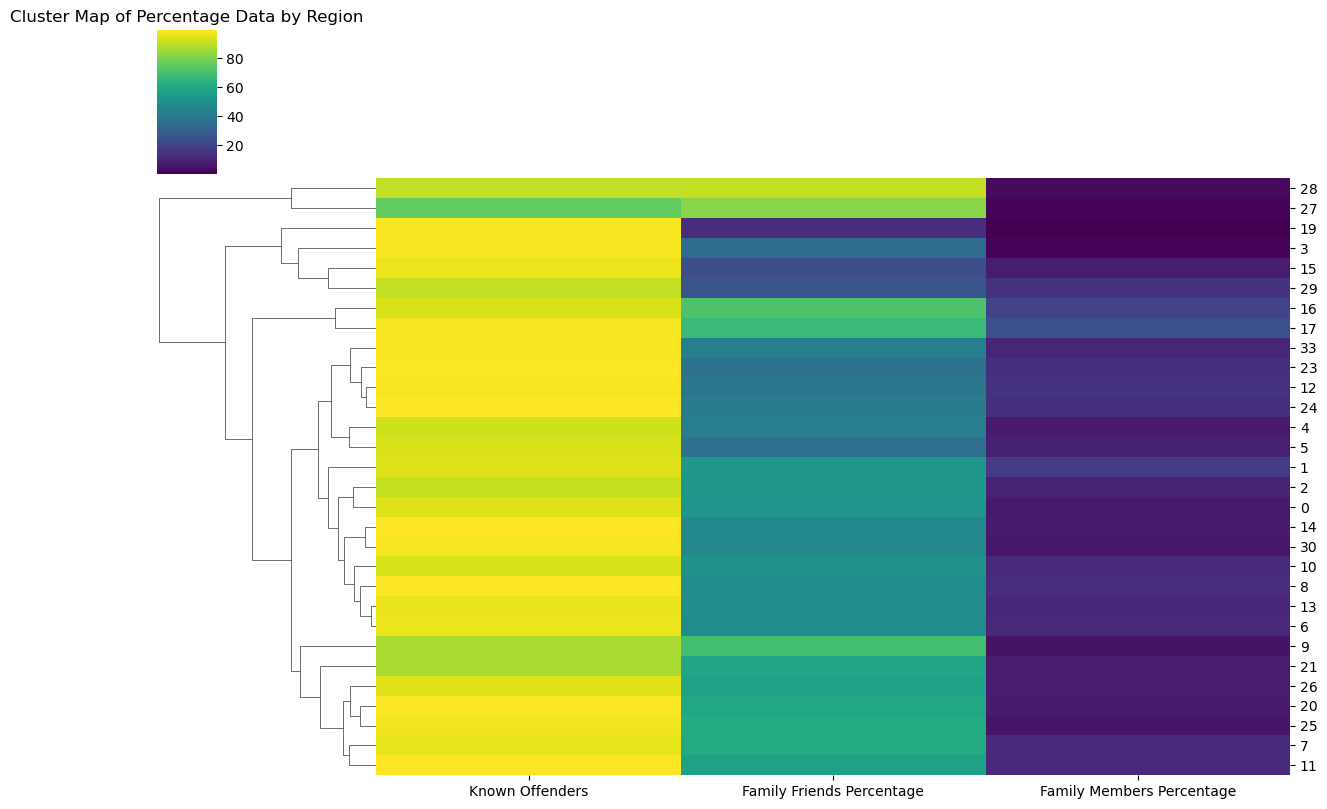

In [47]:

percentage_data['Region'] = percentage_data['State/UT'].map(region_mapping)

# Create a cluster map
cluster_map = sns.clustermap(
    data=percentage_data[[ 'Known Offenders','Family Friends Percentage','Family Members Percentage']].head(30),
    col_cluster=False,
    row_cluster=True,
    cmap='viridis',
    method='average',
    figsize=(12, 8),
)

reordered_indices = cluster_map.dendrogram_row.reordered_ind
cluster_map.ax_row_dendrogram.set_yticks(range(len(reordered_indices)))
cluster_map.ax_row_dendrogram.set_yticklabels(percentage_data['Region'].iloc[reordered_indices], fontsize=8)


plt.title('Cluster Map of Percentage Data by Region')
plt.show()

**Is there a correlation between economic factors and the prevalence of different types of rape cases?**

In [48]:
percentage_data.dropna(inplace =True)

In [49]:
economy_data

,Rank,State,GDP per capita ($)
0,1,Goa,"7,029"
1,2,Sikkim,"6,421"
2,3,Delhi,"5,817"
3,4,Chandigarh,"5,297"
4,5,Haryana,"3,840"
5,6,Karnataka,"3,359"
6,7,Puducherry,"3,334"
7,8,Kerala,"3,327"
8,9,Telangana,"3,321"
9,10,Gujarat,"3,283"


In [50]:
economy_data.rename(columns={"State":"State/UT"}, inplace=True)
economy_data["State/UT"].tolist()

['Goa',
 'Sikkim',
 'Delhi',
 'Chandigarh',
 'Haryana',
 'Karnataka',
 'Puducherry',
 'Kerala',
 'Telangana',
 'Gujarat',
 'Uttarakhand',
 'Maharashtra',
 'Tamil Nadu',
 'Himachal Pradesh',
 'Mizoram',
 'Punjab',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Nagaland',
 'Tripura',
 'Rajasthan',
 'Odisha',
 'Jammu & Kashmir',
 'West Bengal',
 'Chhattisgarh',
 'Madhya Pradesh',
 'Meghalaya',
 'Assam',
 'Manipur',
 'Jharkhand',
 'Uttar Pradesh',
 'Bihar']

In [51]:
percentage_data.merge(economy_data, on='State/UT')
percentage_data

,State/UT,Family Members Percentage,Family Friends Percentage,Total Percentage,Known Offenders,Unknown Offenders,Region
13,Madhya Pradesh,10.616241,48.819351,59.435592,95.877048,4.122952,Central
21,Rajasthan,7.950907,58.511206,66.462113,86.459054,13.540946,West
26,Uttar Pradesh,7.719204,57.046799,64.766003,94.221997,5.778003,North
14,Maharashtra,7.438795,46.657250,54.096045,99.159664,0.840336,West
4,Chhattisgarh,7.101828,41.566580,48.668407,91.582975,8.417025,Central
12,Kerala,14.733542,39.341693,54.075235,98.406170,1.593830,South
2,Assam,9.475806,52.688172,62.163978,90.291262,9.708738,East
7,Haryana,11.974110,60.194175,72.168285,95.370370,4.629630,North
33,Delhi UT,10.469012,42.629816,53.098827,98.271605,1.728395,North
10,Jharkhand,12.019704,49.950739,61.970443,93.119266,6.880734,East


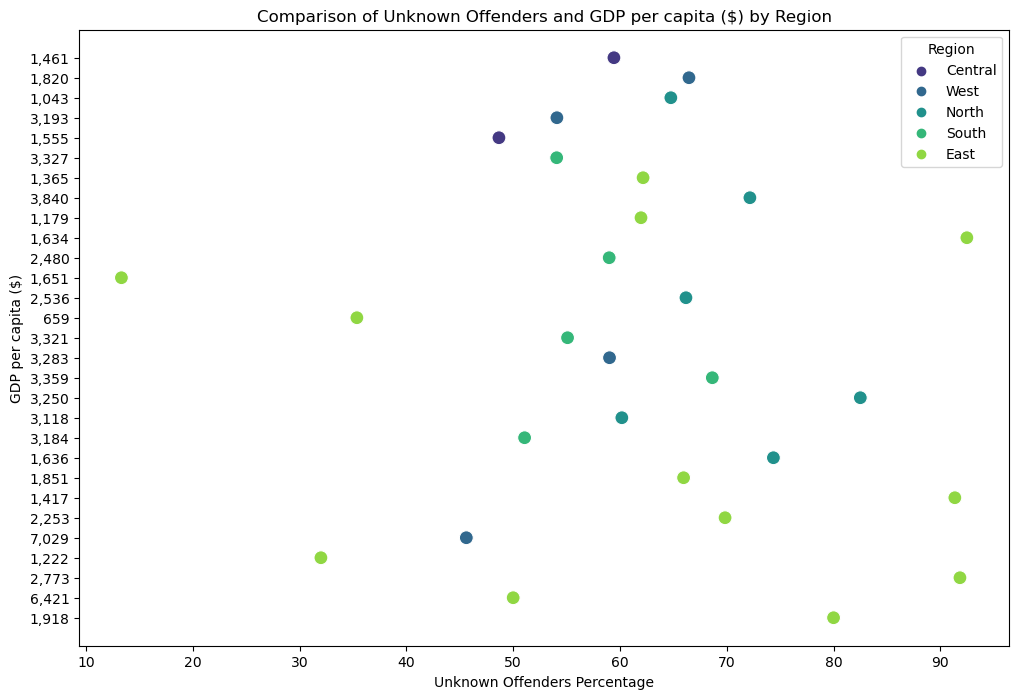

In [52]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Percentage', y='GDP per capita ($)', hue='Region', data=percentage_data.merge(economy_data, on='State/UT'), palette='viridis', s=100)
plt.title('Comparison of Unknown Offenders and GDP per capita ($) by Region')
plt.xlabel('Unknown Offenders Percentage')
plt.ylabel('GDP per capita ($)')
plt.legend(title='Region', bbox_to_anchor=(1, 1))
plt.show()

In [53]:
#Attempt to commmit Q2
Attempt_to_commit_rape_I_V['diff'] = Attempt_to_commit_rape_I_V['Attempt to Commit Rape (Total)(V)']-Attempt_to_commit_rape_I_V['Attempt to Commit Rape (Total)(I)']


In [54]:
max_diff = Attempt_to_commit_rape_I_V['diff'].max()
Attempt_to_commit_rape_I_V['State/UT'][Attempt_to_commit_rape_I_V['diff']==max_diff]

30    Chandigarh
Name: State/UT, dtype: object

In [55]:
Attempt_to_commit_rape_I_V.columns

Index(['State/UT', 'Attempt to Commit Rape (Total)(I)',
       'Attempt to Commit Rape (Total)(V)', 'A) Women (18 Yrs. And above)(I)',
       'A) Women (18 Yrs. And above)(I).1', 'B) Girls (Below 18 yrs))(I)',
       'B) Girls (Below 18 yrs))(I).1', 'diff'],
      dtype='object')

In [56]:
#attempt to commit Q7
attempts_below_18 = Attempt_to_commit_rape_I_V[['State/UT','A) Women (18 Yrs. And above)(I)' ,'B) Girls (Below 18 yrs))(I)']]
sorted_data = attempts_below_18.sort_values(by=['B) Girls (Below 18 yrs))(I)', 'A) Women (18 Yrs. And above)(I)'], ascending=False)

top_5_states = sorted_data.head(5)
print("Top 5 states or UTs with the highest number of attempted rape incidents (I) for age below 18:")
print(top_5_states[['State/UT', 'B) Girls (Below 18 yrs))(I)']])


Top 5 states or UTs with the highest number of attempted rape incidents (I) for age below 18:
          State/UT  B) Girls (Below 18 yrs))(I)
26   Uttar Pradesh                          144
0   Andhra Pradesh                           47
20          Punjab                           44
10       Jharkhand                           38
21       Rajasthan                           37


In [57]:
punished_rapists.head(5)

,State/UT,By Seperated husband (Sec.376 (B)),Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) (Sec.376(DA)),By Person in Authority (Sec.376 (C)),Gang Rape (Sec.376(D)),Rape/Gang Rape of Girl Below 12 Yrs (Imprisonment for life till death) (Sec.376(DB)),Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) (Sec.376(DB)),Punishment for Repeat offenders (Sec.376(E)),Rape (Total) (Sec.376 IPC)
0,Andhra Pradesh,0,13,1,12,0,4,0,971
1,Arunachal Pradesh,0,0,0,1,2,0,0,67
2,Assam,2,0,0,20,1,0,0,1648
3,Bihar,0,0,0,8,1,0,0,651
4,Chhattisgarh,0,14,1,38,4,10,6,2091


In [58]:
punished_rapists.columns

Index(['State/UT', 'By Seperated husband (Sec.376 (B))',
       'Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) (Sec.376(DA))',
       'By Person in Authority (Sec.376 (C))', 'Gang Rape (Sec.376(D))',
       'Rape/Gang Rape of Girl Below 12 Yrs (Imprisonment for life till death) (Sec.376(DB))',
       'Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) (Sec.376(DB))',
       'Punishment for Repeat offenders (Sec.376(E))',
       'Rape (Total) (Sec.376 IPC)'],
      dtype='object')

In [59]:
#Punished_rapists Q

max_values = {}
for column in punished_rapists.columns[1:]:
    max_row = punished_rapists.loc[punished_rapists[column].idxmax()]
    state = max_row['State/UT']
    value = max_row[column]
    
    max_values[column] = {'State/UT': state, 'Max Value': value}

max_values_df = pd.DataFrame.from_dict(max_values, orient='index')
print("Table with the maximum value for each attribute and its corresponding state:")
print(max_values_df)


Table with the maximum value for each attribute and its corresponding state:
                                                          State/UT  Max Value
By Seperated husband (Sec.376 (B))                         Haryana         14
Rape/Gang Rape of Girl Below 16 Yrs (Imprisonme...  Madhya Pradesh         56
By Person in Authority (Sec.376 (C))                     Jharkhand         35
Gang Rape (Sec.376(D))                                   Rajasthan        556
Rape/Gang Rape of Girl Below 12 Yrs (Imprisonme...         Tripura          9
Rape/Gang Rape of Girl Below 16 Yrs (Imprisonme...       Rajasthan         51
Punishment for Repeat offenders (Sec.376(E))        Madhya Pradesh        132
Rape (Total) (Sec.376 IPC)                          Madhya Pradesh       5433


In [60]:
punished_rapists_df = punished_rapists
punished_rapists_df.rename(columns={"State/UT": "state"}, inplace=True)
geojson_url = "https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson"

# Create first choropleth map
fig1 = px.choropleth(
    punished_rapists_df,
    geojson=geojson_url,
    featureidkey='properties.ST_NM',
    locations='state',
    color='By Seperated husband (Sec.376 (B))',
    color_continuous_scale='picnic',
    hover_name='state'
)

# Create second choropleth map with multiple color variables
fig2 = px.choropleth(
    punished_rapists_df,
    geojson=geojson_url,
    featureidkey='properties.ST_NM',
    locations='state',
    color='Gang Rape (Sec.376(D))',
    color_continuous_scale='piyg',
    hover_name='state'
)

fig1.update_geos(fitbounds="locations", visible=False)
fig2.update_geos(fitbounds="locations", visible=False)

fig1.show()
fig2.show()


<h4>Note:</h4>
<p>The GeoJSON file utilized in this visualization may not be entirely compatible with our dataset, leading to the absence of some states on the map. Please be aware that this discrepancy is due to differences in state names or other factors between the GeoJSON file and our dataset. Our intention is solely to provide a visual representation based on the available data, and we appreciate your understanding.</p>


In [61]:
Disposal_CrimeHead_Wise_2018.head(6)

,Crime Head,Persons Arrested Male,Persons Arrested Female,Persons Arrested Total,Persons Chargesheeted Male,Persons Chargesheeted Female,Persons Chargesheeted Total,Persons Convicted Male,Persons Convicted Female,Persons Convicted Total,Persons Discharged Male,Persons Discharged Female,Persons Discharged Total,Persons Acquitted Male,Persons Acquitted Female,Persons Acquitted Total
0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,POCSO Act Section 4 & 6,25641,605,26246,23673,465,24138,3037,20,3057,356,2,358,5333,86,5419
2,POCSO Act Section 8 & 10,16980,164,17144,16005,131,16136,1918,8,1926,144,1,145,2581,10,2591
3,Rape,40225,892,41117,36737,776,37513,5921,48,5969,1996,26,2022,14177,214,14391
4,Murder with Rape/Gang Rape,409,14,423,332,12,344,36,0,36,1,0,1,31,2,33


In [62]:
#Disposal_CrimeHead_Wise_2018 Single concept Que

In [63]:
#Disposal_CrimeHead_Wise_2018 Single concept Que

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



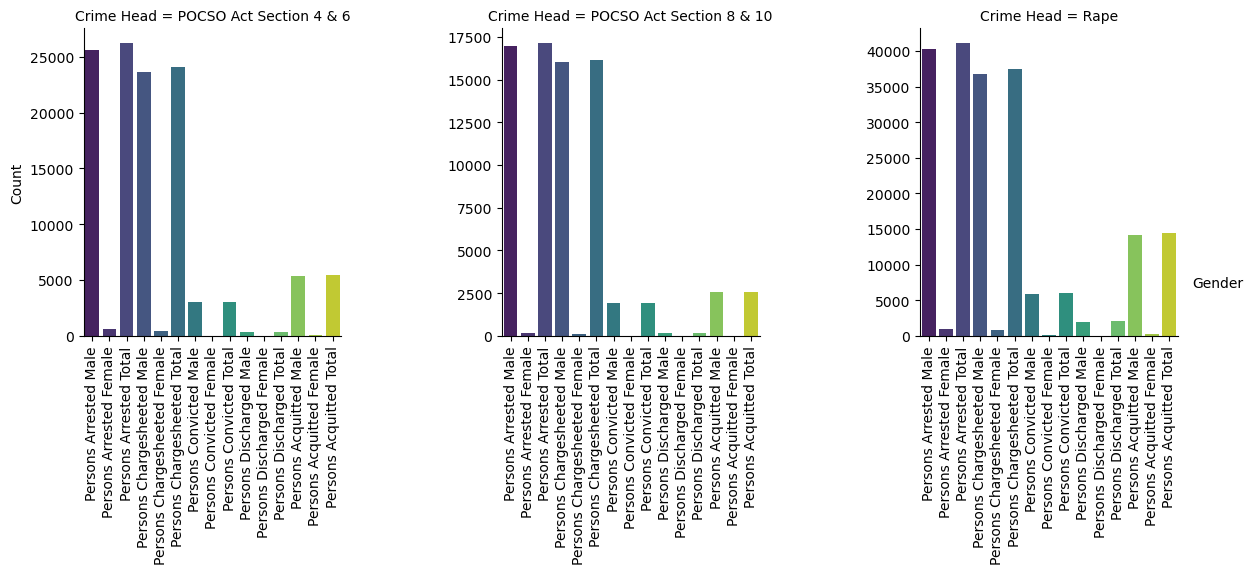

In [64]:
crime_head_categories = ["POCSO Act Section 4 & 6", "POCSO Act Section 8 & 10", "Rape"]

filtered_data = Disposal_CrimeHead_Wise_2018[Disposal_CrimeHead_Wise_2018['Crime Head'].isin(crime_head_categories)]

# Melt the DataFrame to reshape it for plotting with FacetGrid
melted_data = pd.melt(filtered_data, id_vars=['Crime Head'], var_name='Gender', value_name='Count')

# Create a FacetGrid
g = sns.FacetGrid(melted_data, col='Crime Head', col_wrap=3, height=4, sharey=False)

# Plot the data
g.map(sns.barplot, 'Gender', 'Count', hue_order=['Persons Arrested Male', 'Persons Arrested Female',
                                                  'Persons Chargesheeted Male', 'Persons Chargesheeted Female',
                                                  'Persons Convicted Male', 'Persons Convicted Female',
                                                  'Persons Discharged Male', 'Persons Discharged Female',
                                                  'Persons Acquitted Male', 'Persons Acquitted Female']
                                                  , palette='viridis')

# Customize the plot
g.set_axis_labels("", "Count")
g.add_legend(title="Gender")
g.set_xticklabels(rotation=90)
# Show the plot
plt.show()


In [170]:
Rape_under_Different_age_groups_2018

,State/UT,Cases Reported,Below 6 Years,6 Years & Above (Below 12 Years),12 Years & Above(Below 16 Years),16 Years & Above(Below 18 Years ),Total Girl /Child Victims(Below 18),18 Years & Above( Below 30 Years ),30 Years & Above (Below 45 Years),45 Years & Above(Below 60 Years),60 Years & Above,Total Women / Adult Victims(Above 18),Total Victims
0,Andhra Pradesh,971,16,57,181,251,505,373,76,14,5,468,973
1,Arunachal Pradesh,67,4,4,13,11,32,29,9,0,0,38,70
2,Assam,1648,7,24,6,52,89,1043,523,107,5,1678,1767
3,Bihar,651,0,0,1,3,4,520,111,16,0,647,651
4,Chhattisgarh,2091,41,80,557,541,1219,644,190,42,6,882,2101
5,Goa,61,0,1,21,12,34,13,11,2,1,27,61
6,Gujarat,553,0,0,3,4,7,389,144,12,1,546,553
7,Haryana,1296,2,0,0,0,2,969,300,22,3,1294,1296
8,Himachal Pradesh,344,2,25,85,84,196,101,45,6,1,153,349
9,Jammu & Kashmir,320,0,6,18,18,42,172,109,5,0,286,328


In [66]:
Rape_under_Different_age_groups_2018.columns

Index(['State/UT ', 'Cases Reported ', 'Below 6 Years ',
       '6 Years & Above (Below 12 Years) ', '12 Years & Above(Below 16 Years)',
       '16 Years & Above(Below 18 Years )',
       'Total Girl /Child Victims(Below 18)',
       '18 Years & Above( Below 30 Years )',
       '30 Years & Above (Below 45 Years)', '45 Years & Above(Below 60 Years)',
       '60 Years & Above ', 'Total Women / Adult Victims(Above 18)',
       'Total Victims '],
      dtype='object')

In [67]:
sorted_age_group_df = Rape_under_Different_age_groups_2018.sort_values(by ='Total Victims ', ascending=False)

In [68]:
sorted_age_group_df['Below_18'] = sorted_age_group_df['Below 6 Years '] + sorted_age_group_df['6 Years & Above (Below 12 Years) '] + sorted_age_group_df['12 Years & Above(Below 16 Years)'] + sorted_age_group_df['16 Years & Above(Below 18 Years )']
sorted_age_group_df['18_to_45'] = sorted_age_group_df['18 Years & Above( Below 30 Years )'] + sorted_age_group_df['30 Years & Above (Below 45 Years)']
sorted_age_group_df['45_and_above'] = sorted_age_group_df['45 Years & Above(Below 60 Years)'] + sorted_age_group_df['60 Years & Above ']

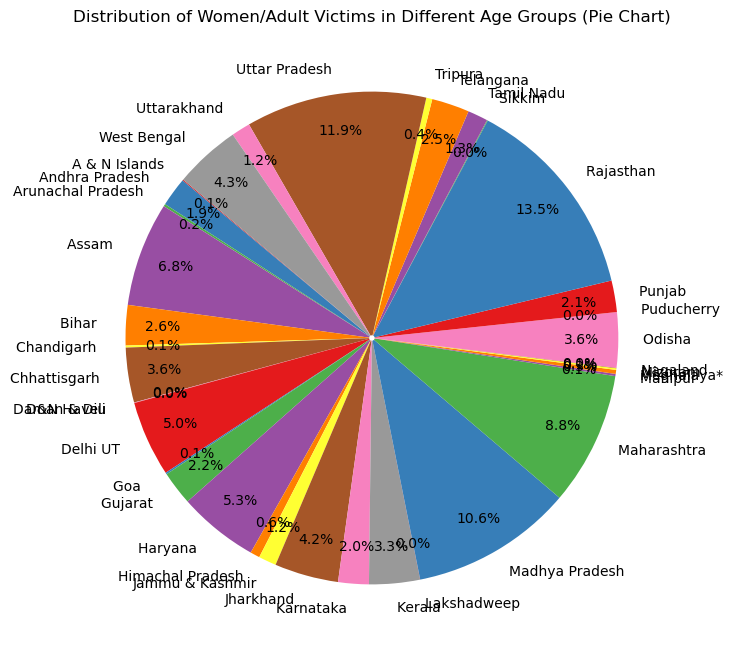

In [171]:
age_group_columns = ['State/UT ', '18 Years & Above( Below 30 Years )', '30 Years & Above (Below 45 Years)',
                      '45 Years & Above(Below 60 Years)', '60 Years & Above ', 'Total Women / Adult Victims(Above 18)']

age_group_data = Rape_under_Different_age_groups_2018[age_group_columns]

age_group_distribution = age_group_data.groupby('State/UT ').sum()

custom_palette = sns.color_palette("Set1", len(age_group_distribution))

plt.figure(figsize=(12, 8))
plt.pie(age_group_distribution['Total Women / Adult Victims(Above 18)'],
        labels=age_group_distribution.index,
        autopct=lambda p: '{:.1f}%'.format(p),
        startangle=140,
        pctdistance=0.85,
        colors=custom_palette)

plt.gca().add_artist(plt.Circle((0, 0), 0.011, fc='white'))

plt.title('Distribution of Women/Adult Victims in Different Age Groups (Pie Chart)')
plt.show()


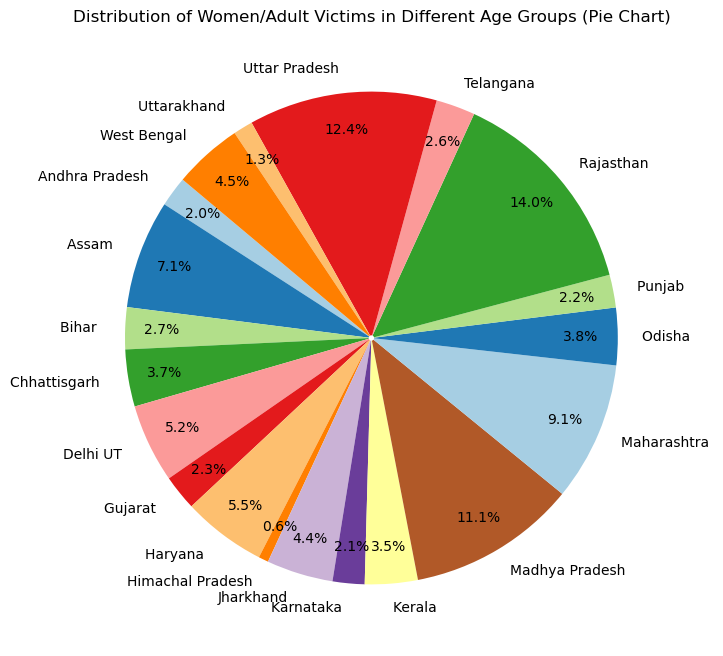

In [ ]:
#Pie chart
age_group_data = Rape_under_Different_age_groups_2018.sort_values(by ='Total Victims ', ascending=False)
# Calculate the distribution of women/adult victims in different age groups
age_group_data = age_group_data.head(20)
age_group_distribution = age_group_data.groupby('State/UT ').sum()

# Define a custom color palette
custom_palette = sns.color_palette("Paired", len(age_group_distribution))

# Plot a pie chart with custom colors and adjusted percentage position
plt.figure(figsize=(12, 8))
plt.pie(age_group_distribution['Total Women / Adult Victims(Above 18)'],
        labels=age_group_distribution.index,
        autopct=lambda p: '{:.1f}%'.format(p),
        startangle=140,
        pctdistance=0.85,
        colors=custom_palette)
# Adjust the position of the percentage values outside the pie chart
plt.gca().add_artist(plt.Circle((0, 0), 0.011, fc='white'))

plt.title('Distribution of Women/Adult Victims in Different Age Groups (Pie Chart)')
plt.show()

In [ ]:
Rapist_Victim_relation.head(6)

,State/UT,Cases Offender known to Victim (Total),Family members,Family Friends/ Neighbours/ Employer or Other Known Persons,Friends/Online-Friends or Live in Partners on Pretext of Marriage/Seperated Husband,Cases Offenders Unknown or Not Identified,Total Rape Cases (Known+unknown Offenders),Percentage Share of Known Cases to Total Rape Cases
0,Andhra Pradesh,912,64,474,374,59,971,93.9
1,Arunachal Pradesh,63,11,33,19,4,67,94
2,Assam,1488,141,784,563,160,1648,90.3
3,Bihar,639,7,219,413,12,651,98.2
4,Chhattisgarh,1915,136,796,983,176,2091,91.6
5,Goa,57,5,21,31,4,61,93.4


In [ ]:
Attempt_to_commit_rape_I_V.columns.tolist()

['State/UT',
 'Attempt to Commit Rape (Total)(I)',
 'Attempt to Commit Rape (Total)(V)',
 'A) Women (18 Yrs. And above)(I)',
 'A) Women (18 Yrs. And above)(I).1',
 'B) Girls (Below 18 yrs))(I)',
 'B) Girls (Below 18 yrs))(I).1',
 'diff']

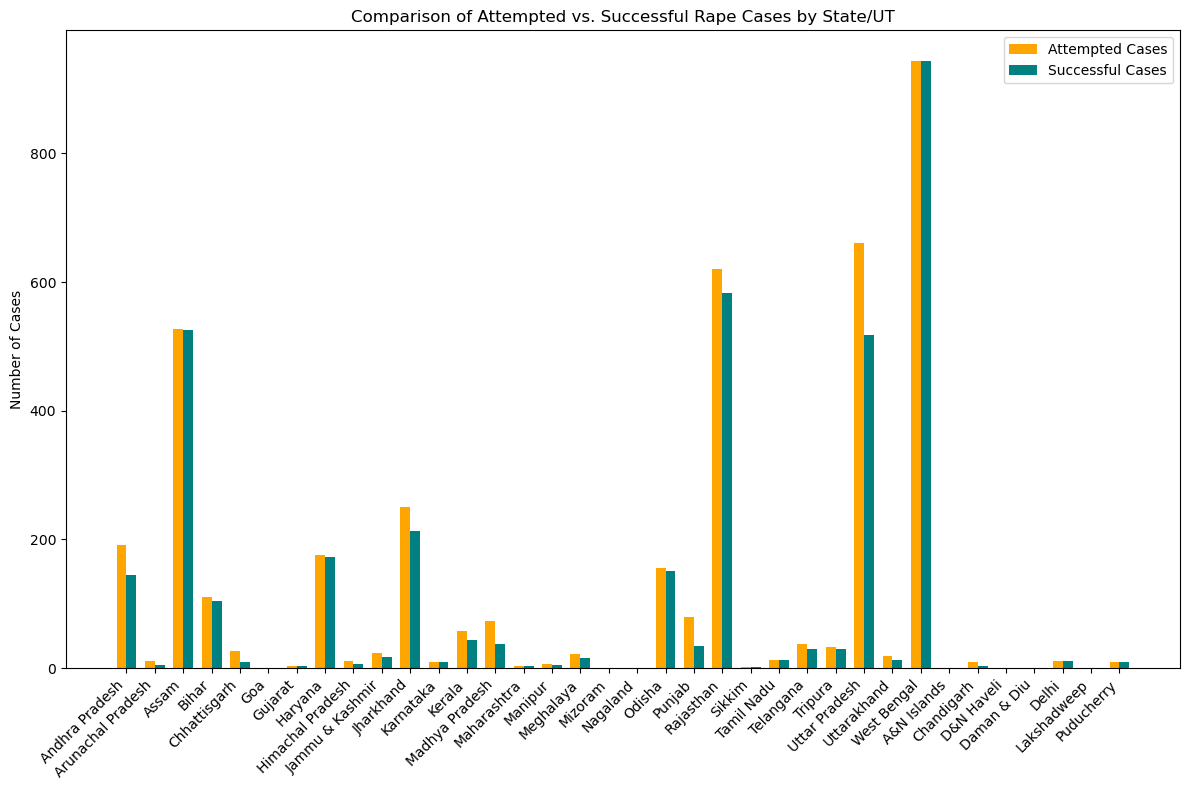

In [ ]:
states = Attempt_to_commit_rape_I_V['State/UT']
attempted_cases = Attempt_to_commit_rape_I_V['Attempt to Commit Rape (Total)(I)']
successful_cases = Attempt_to_commit_rape_I_V['A) Women (18 Yrs. And above)(I)']

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35

bar_positions_attempted = np.arange(len(states))
bar_positions_successful = bar_positions_attempted + bar_width

attempted_bar = ax.bar(bar_positions_attempted, attempted_cases, width=bar_width, label='Attempted Cases',color='orange')
successful_bar = ax.bar(bar_positions_successful, successful_cases, width=bar_width, label='Successful Cases',color='teal')

ax.set_xticks(bar_positions_attempted + bar_width / 2)
ax.set_xticklabels(states, rotation=45, ha='right')
ax.set_ylabel('Number of Cases')
ax.set_title('Comparison of Attempted vs. Successful Rape Cases by State/UT')
ax.legend()

plt.tight_layout()
plt.show()


<h3> Factors possibly co-related to rape counts:</h3>

  * Sex ratio
  * Literacy rate
  * population density
  * unemployment rate
  

In [ ]:
Population_Dsitribution_statewise.head(6)

,State/UT,Area in sq. kms.,Male Population,Female Population,Total Population,Rural Population,Urban Population
0,Andhra Pradesh,275045,42442146,42138631,84580777,56361702,28219075
1,Arunachal Pradesh,83743,713912,669815,1383727,1066358,317369
2,Assam,78438,15939443,15266133,31205576,26807034,4398542
3,Bihar,94163,54278157,49821295,104099452,92341436,11758016
4,Chhattisgarh,135192,12832895,12712303,25545198,19607961,5937237
5,Goa,3702,739140,719405,1458545,551731,906814


In [ ]:
index_telangana = Rape_under_Different_age_groups_2018[Rape_under_Different_age_groups_2018['State/UT ']=='Telangana '].index[0]
print(index_telangana)
dummy_Rape_under_Different_age_groups_2018 = Rape_under_Different_age_groups_2018.drop(index_telangana)

24


In [ ]:
dummy_Rape_under_Different_age_groups_2018['State/UT '] = Population_Dsitribution_statewise['State/UT']

In [ ]:
listA = dummy_Rape_under_Different_age_groups_2018['State/UT ']
listB = Population_Dsitribution_statewise['State/UT']

In [ ]:
dummy_Rape_under_Different_age_groups_2018.drop(35,inplace=True)

In [ ]:
dummy_Rape_under_Different_age_groups_2018['State/UT '] 

0        Andhra Pradesh
1     Arunachal Pradesh
2                 Assam
3                 Bihar
4          Chhattisgarh
5                  Goa 
6               Gujarat
7               Haryana
8      Himachal Pradesh
9       Jammu & Kashmir
10            Jharkhand
11            Karnataka
12               Kerala
13       Madhya Pradesh
14          Maharashtra
15             Manipur 
16            Meghalaya
17              Mizoram
18             Nagaland
19               Odisha
20               Punjab
21            Rajasthan
22               Sikkim
23           Tamil Nadu
25        Uttar Pradesh
26          Uttarakhand
27          West Bengal
28       A.& N.Islands 
29          Chandigarh 
30        D.& N.Haveli 
31         Daman & Diu 
32               Delhi 
33         Lakshadweep 
34          Puducherry 
Name: State/UT , dtype: object

In [ ]:
Population_Dsitribution_statewise['State/UT']

0        Andhra Pradesh
1     Arunachal Pradesh
2                 Assam
3                 Bihar
4          Chhattisgarh
5                  Goa 
6               Gujarat
7               Haryana
8      Himachal Pradesh
9       Jammu & Kashmir
10            Jharkhand
11            Karnataka
12               Kerala
13       Madhya Pradesh
14          Maharashtra
15             Manipur 
16            Meghalaya
17              Mizoram
18             Nagaland
19               Odisha
20               Punjab
21            Rajasthan
22               Sikkim
23           Tamil Nadu
24              Tripura
25        Uttar Pradesh
26          Uttarakhand
27          West Bengal
28       A.& N.Islands 
29          Chandigarh 
30        D.& N.Haveli 
31         Daman & Diu 
32               Delhi 
33         Lakshadweep 
34          Puducherry 
Name: State/UT, dtype: object

In [ ]:
attr = Population_Dsitribution_statewise.columns
attr = list(attr)

In [ ]:
attr

['State/UT',
 ' Area in sq. kms.',
 'Male Population',
 'Female Population',
 'Total Population',
 'Rural Population',
 'Urban Population']

In [ ]:
del attr[0]

In [ ]:
attr

[' Area in sq. kms.',
 'Male Population',
 'Female Population',
 'Total Population',
 'Rural Population',
 'Urban Population']

In [ ]:
for i in attr:
    dummy_Rape_under_Different_age_groups_2018[i]=Population_Dsitribution_statewise[i]


In [ ]:
dummy_Rape_under_Different_age_groups_2018.head(9)

,State/UT,Cases Reported,Below 6 Years,6 Years & Above (Below 12 Years),12 Years & Above(Below 16 Years),16 Years & Above(Below 18 Years ),Total Girl /Child Victims(Below 18),18 Years & Above( Below 30 Years ),30 Years & Above (Below 45 Years),45 Years & Above(Below 60 Years),...,Male Population,Female Population,Total Population,Rural Population,Urban Population,population_density,Below_18,18_to_45,45_and_above,rural_population_density
13,Madhya Pradesh,5433,54,142,1143,1502,2841,1798,725,75,...,37612306,35014503,72626809,52557404,20069405,235.608557,2841,2523,86,170.501421
21,Rajasthan,4335,17,48,392,575,1032,2263,912,129,...,35550997,32997440,68548437,51500352,17048085,200.294055,1032,3175,130,150.480664
26,Uttarakhand,3946,67,174,570,600,1411,2235,603,70,...,5137773,4948519,10086292,7036954,3049338,188.588748,1411,2838,73,131.573659
14,Maharashtra,2142,0,0,0,0,0,1524,552,62,...,58243056,54131277,112374333,61556074,50818259,365.192023,0,2076,73,200.043788
4,Chhattisgarh,2091,41,80,557,541,1219,644,190,42,...,12832895,12712303,25545198,19607961,5937237,188.954953,1219,834,48,145.037879
12,Kerala,1945,48,129,334,645,1156,465,294,43,...,16027412,17378649,33406061,17471135,15934926,859.828606,1156,759,57,449.684315
2,Assam,1648,7,24,6,52,89,1043,523,107,...,15939443,15266133,31205576,26807034,4398542,397.837477,89,1566,112,341.760805
7,Haryana,1296,2,0,0,0,2,969,300,22,...,13494734,11856728,25351462,16509359,8842103,573.406813,2,1269,25,373.413530
33,Lakshadweep,1215,0,0,0,0,0,851,345,19,...,33123,31350,64473,14141,50332,2149.100000,0,1196,21,471.366667


In [ ]:
dummy_Rape_under_Different_age_groups_2018['population_density'] = dummy_Rape_under_Different_age_groups_2018['Total Population']/dummy_Rape_under_Different_age_groups_2018[' Area in sq. kms.']

In [ ]:
dummy_Rape_under_Different_age_groups_2018.columns

Index(['State/UT ', 'Cases Reported ', 'Below 6 Years ',
       '6 Years & Above (Below 12 Years) ', '12 Years & Above(Below 16 Years)',
       '16 Years & Above(Below 18 Years )',
       'Total Girl /Child Victims(Below 18)',
       '18 Years & Above( Below 30 Years )',
       '30 Years & Above (Below 45 Years)', '45 Years & Above(Below 60 Years)',
       '60 Years & Above ', 'Total Women / Adult Victims(Above 18)',
       'Total Victims ', ' Area in sq. kms.', 'Male Population',
       'Female Population', 'Total Population', 'Rural Population',
       'Urban Population', 'population_density'],
      dtype='object')

In [ ]:
dummy_Rape_under_Different_age_groups_2018.sort_values(by ='Total Victims ', ascending=False,inplace=True)

In [ ]:
dummy_Rape_under_Different_age_groups_2018['Below_18'] = dummy_Rape_under_Different_age_groups_2018['Below 6 Years '] + dummy_Rape_under_Different_age_groups_2018['6 Years & Above (Below 12 Years) '] + dummy_Rape_under_Different_age_groups_2018['12 Years & Above(Below 16 Years)'] + dummy_Rape_under_Different_age_groups_2018['16 Years & Above(Below 18 Years )']
dummy_Rape_under_Different_age_groups_2018['18_to_45'] = dummy_Rape_under_Different_age_groups_2018['18 Years & Above( Below 30 Years )'] + dummy_Rape_under_Different_age_groups_2018['30 Years & Above (Below 45 Years)']
dummy_Rape_under_Different_age_groups_2018['45_and_above'] = dummy_Rape_under_Different_age_groups_2018['45 Years & Above(Below 60 Years)'] + dummy_Rape_under_Different_age_groups_2018['60 Years & Above ']

In [ ]:
dummy_Rape_under_Different_age_groups_2018.head(7)

,State/UT,Cases Reported,Below 6 Years,6 Years & Above (Below 12 Years),12 Years & Above(Below 16 Years),16 Years & Above(Below 18 Years ),Total Girl /Child Victims(Below 18),18 Years & Above( Below 30 Years ),30 Years & Above (Below 45 Years),45 Years & Above(Below 60 Years),...,Area in sq. kms.,Male Population,Female Population,Total Population,Rural Population,Urban Population,population_density,Below_18,18_to_45,45_and_above
13,Madhya Pradesh,5433,54,142,1143,1502,2841,1798,725,75,...,308252,37612306,35014503,72626809,52557404,20069405,235.608557,2841,2523,86
21,Rajasthan,4335,17,48,392,575,1032,2263,912,129,...,342239,35550997,32997440,68548437,51500352,17048085,200.294055,1032,3175,130
26,Uttarakhand,3946,67,174,570,600,1411,2235,603,70,...,53483,5137773,4948519,10086292,7036954,3049338,188.588748,1411,2838,73
14,Maharashtra,2142,0,0,0,0,0,1524,552,62,...,307713,58243056,54131277,112374333,61556074,50818259,365.192023,0,2076,73
4,Chhattisgarh,2091,41,80,557,541,1219,644,190,42,...,135192,12832895,12712303,25545198,19607961,5937237,188.954953,1219,834,48
12,Kerala,1945,48,129,334,645,1156,465,294,43,...,38852,16027412,17378649,33406061,17471135,15934926,859.828606,1156,759,57
2,Assam,1648,7,24,6,52,89,1043,523,107,...,78438,15939443,15266133,31205576,26807034,4398542,397.837477,89,1566,112


In [ ]:
dummy_Rape_under_Different_age_groups_2018['rural_population_density'] = dummy_Rape_under_Different_age_groups_2018['Rural Population']/dummy_Rape_under_Different_age_groups_2018[' Area in sq. kms.']

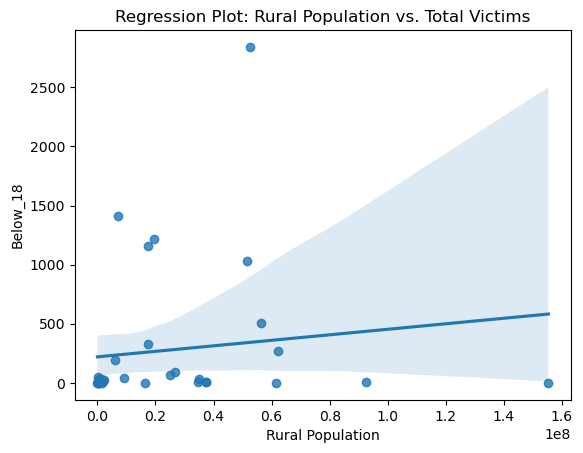

In [ ]:
# Scatter plot
#sns.scatterplot(x='population_density', y='Total Victims ', data=dummy_Rape_under_Different_age_groups_2018)
#plt.title('Scatter Plot: Rural Population vs. Total Victims')
# Regression plot


sns.regplot(x='Rural Population', y='Below_18', data=dummy_Rape_under_Different_age_groups_2018)
plt.title('Regression Plot: Rural Population vs. Total Victims')
plt.show()



In [ ]:
Rape_under_Different_age_groups_2018_df = Rape_under_Different_age_groups_2018

In [294]:
print(state)

Madhya Pradesh


In [295]:
sorted_age_group_df['state'] = states

In [298]:
import plotly.express as px

geojson_url = "https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson"

fig1 = px.choropleth(
    sorted_age_group_df,
    geojson=geojson_url,
    featureidkey='properties.ST_NM',
    locations='state',
    color='Below_18',
    color_continuous_scale='YlGnBu',
    hover_name='state',
)
fig2 = px.choropleth(
    sorted_age_group_df,
    geojson=geojson_url,
    featureidkey='properties.ST_NM',
    locations='state',
    color='18_to_45',
    color_continuous_scale='blues',
    hover_name='state',
)
fig3 = px.choropleth(
    sorted_age_group_df,
    geojson=geojson_url,
    featureidkey='properties.ST_NM',
    locations='state',
    color='45_and_above',
    color_continuous_scale='YlOrRd',
    hover_name='state',
)

fig1.update_geos(fitbounds="locations", visible=False)
fig2.update_geos(fitbounds="locations", visible=False)
fig3.update_geos(fitbounds="locations", visible=False)

fig1.show()
fig2.show()
fig3.show()


<h4>Note:</h4>
<p>The GeoJSON file utilized in this visualization may not be entirely compatible with our dataset, leading to the absence of some states on the map. Please be aware that this discrepancy is due to differences in state names or other factors between the GeoJSON file and our dataset. Our intention is solely to provide a visual representation based on the available data, and we appreciate your understanding.</p>


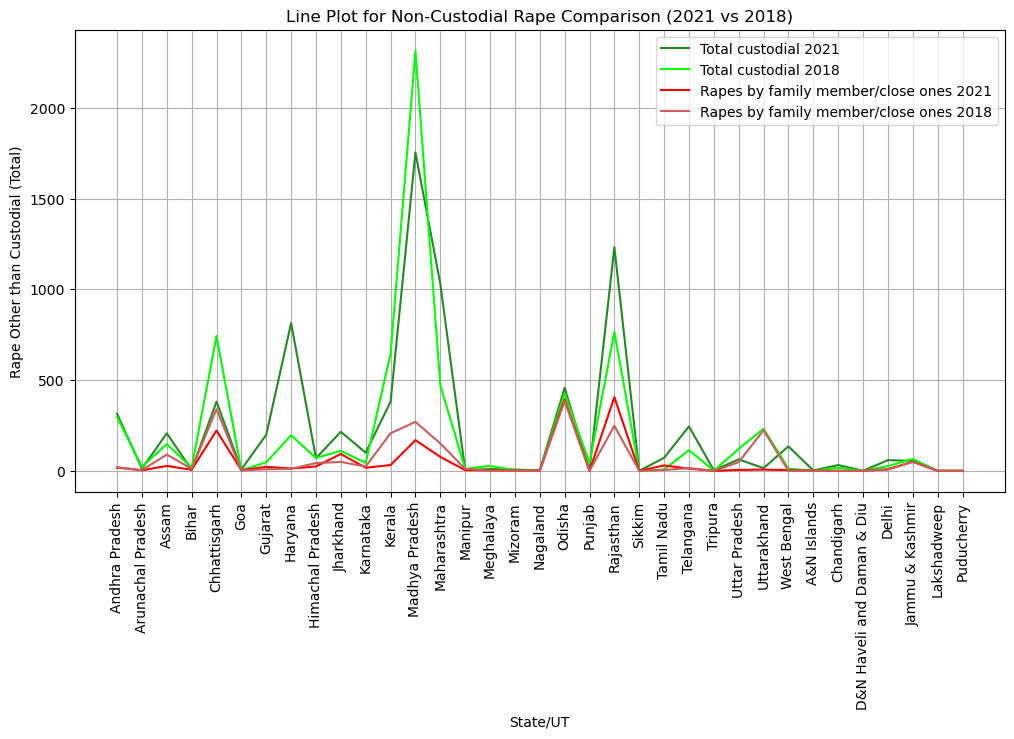

In [300]:
title1 = "Total custodial 2021"
title2 = "Total custodial 2018"
title3 = "Rapes by family member/close ones 2021"
title4= "Rapes by family member/close ones 2018"
plt.figure(figsize=(12, 6))

plt.plot(Non_custodial_rape_2021['State/UT'], Non_custodial_rape_2021['Rape Other than Custodial (Total)'],
          label=title1,color='forestgreen')
plt.plot(Non_custodial_rape_2021['State/UT'], Non_custodial_rape['Rape Other than Custodial (Total)'],
          label=title2,color='lime')
plt.plot(Non_custodial_rape_2021['State/UT'], Non_custodial_rape_2021['By Relative/ Guardian / Teacher/ Person in position of trust (Sec.376(2) (f)'],
          label=title3,color='red')
plt.plot(Non_custodial_rape_2021['State/UT'], Non_custodial_rape['By Relative/Guardian/Teacher/person in position of trust (Sec.376(2) (f)'],
          label=title4,color='indianred')

plt.xlabel('State/UT')
plt.ylabel('Rape Other than Custodial (Total)')
plt.title('Line Plot for Non-Custodial Rape Comparison (2021 vs 2018)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

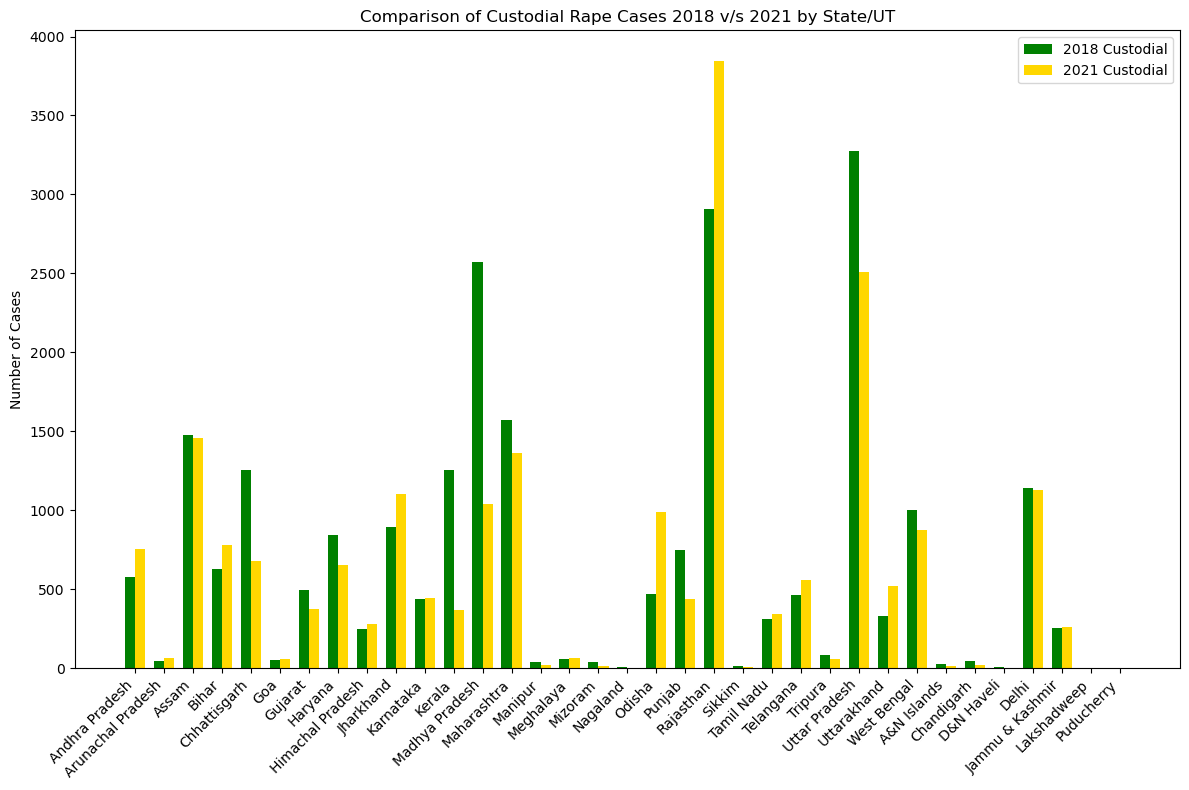

In [301]:
states = Custodial_rape['State/UT']
Total_rapes_in_Custody = Custodial_rape['Punishment for Rape (Sec.376 & 376(I)']
Total_rapes_in_Custody_2021 = Custodial_rape_2021['Punishment for Rape (Sec.376 & 376(I)']

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35

bar_positions_attempted = np.arange(len(Custodial_rape['Rape in Custody (Total)']))
bar_positions_successful = bar_positions_attempted + bar_width

Total_rapes_in_Custody = ax.bar(bar_positions_attempted, Total_rapes_in_Custody, width=bar_width, label='2018 Custodial',color='green')
Total_rapes_in_Custody_2021 = ax.bar(bar_positions_successful, Total_rapes_in_Custody_2021, width=bar_width, label='2021 Custodial',color='gold')

ax.set_xticks(bar_positions_attempted + bar_width / 2)
ax.set_xticklabels(states, rotation=45, ha='right')
ax.set_ylabel('Number of Cases')
ax.set_title('Comparison of Custodial Rape Cases 2018 v/s 2021 by State/UT')
ax.legend()

plt.tight_layout()
plt.show()
